In [ ]:
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

-----------
Initializing structure...
time for choose_chunkdivision = 7.20024e-05 s
Working in 3D dimensions.
Computational cell is 10 x 12 x 10 with resolution 20
time for set_epsilon = 14.1577 s
-----------
Meep: using complex fields.
Meep progress: 0.025/10.0 = 0.2% done in 6.2s, 2480.4s to go
on time step 1 (time=0.025), 6.21656 s/step
Meep progress: 0.275/10.0 = 2.8% done in 10.5s, 369.9s to go
on time step 11 (time=0.275), 0.424194 s/step
Meep progress: 0.525/10.0 = 5.2% done in 14.6s, 264.3s to go
on time step 21 (time=0.525), 0.418727 s/step
Meep progress: 0.775/10.0 = 7.8% done in 18.8s, 224.4s to go
on time step 31 (time=0.775), 0.420098 s/step
Meep progress: 1.0250000000000001/10.0 = 10.2% done in 23.0s, 201.7s to go
on time step 41 (time=1.025), 0.418641 s/step
Meep progress: 1.2750000000000001/10.0 = 12.8% done in 27.2s, 186.2s to go
on time step 51 (time=1.275), 0.417787 s/step
Meep progress: 1.5250000000000001/10.0 = 15.2% done in 31.4s, 174.6s to go
on time step 61 (tim

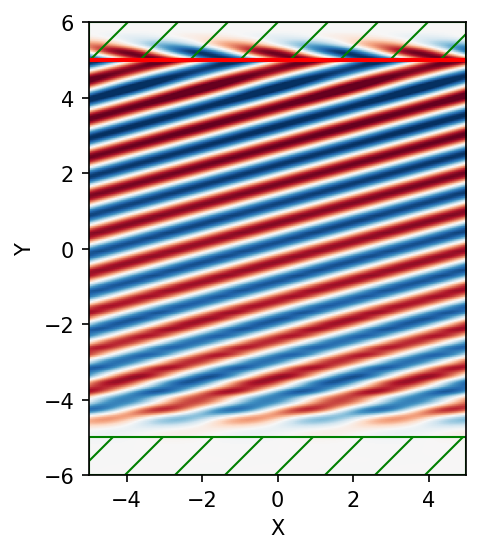

In [13]:
# 3D simulation, planewave in y direction, E field in x direction, 15-degree tilt (from vertical)
theta_src=math.radians(15)

wvl = 1
fcen = 1/wvl

resolution = 20/wvl

s = 10 * wvl
dpml = 1 * wvl  # thickness of PML layers

sx = s
sy = s + 2*dpml
sz = s
cell = mp.Vector3(sx, sy, sz)

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y)]

def pw_amp(k,x0):
    def _pw_amp(x):
        return cmath.exp(1j*2*math.pi*k.dot(x+x0))
    return _pw_amp

k = mp.Vector3(math.sin(theta_src), math.cos(theta_src), 0).scale(fcen)
if theta_src == 0:
    k = mp.Vector3(0,0,0)

src_pt = mp.Vector3(y=0.5*sy-dpml)

sources = [mp.Source(mp.ContinuousSource(fcen, fwidth=0.02*fcen),
                     component=mp.Ex,
                     center=src_pt,
                     size=mp.Vector3(x=sx, z=sz),
                     amp_func=pw_amp(k, src_pt))]

sim = mp.Simulation(cell_size=cell,
                    sources=sources,
                    k_point=k,
                    boundary_layers=pml_layers,
                    resolution=resolution)

t = 10  # run time
f = plt.figure(dpi=150)
volume = mp.Block(size=mp.Vector3(sx,sy,0), center=mp.Vector3(z=int(sz/2)))
Animate = mp.Animate2D(sim, output_plane=volume, fields=mp.Ex, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.1, Animate), until=t)

filename = "test.mp4"
Animate.to_mp4(10,filename)
Video(filename)